In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
df = pd.read_csv("customer.dataset.csv")

In [22]:
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [23]:
df.shape

(100000, 12)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [25]:
threshold = df['purchase_amount'].median()
df['Purchase'] = (df['purchase_amount'] > threshold).astype(int)

In [26]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
Purchase              0
dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)
y = df['Purchase']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

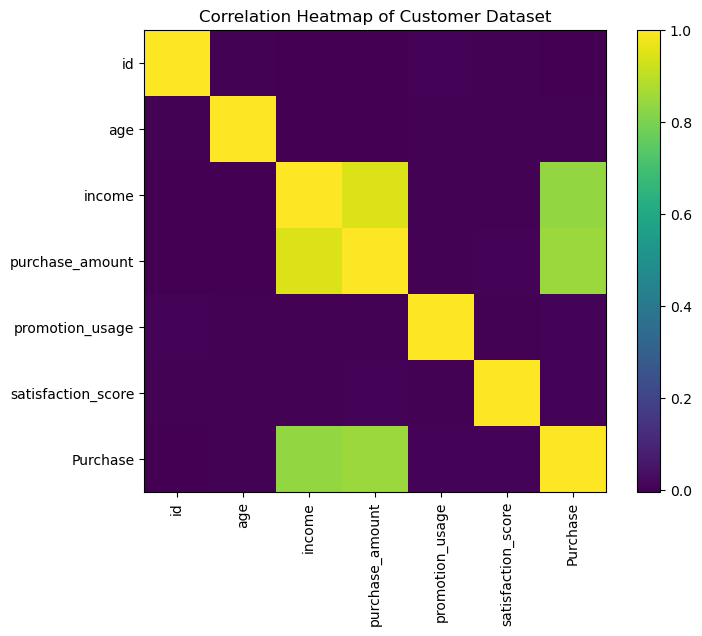

In [28]:
# Selection of only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)

plt.title("Correlation Heatmap of Customer Dataset")
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

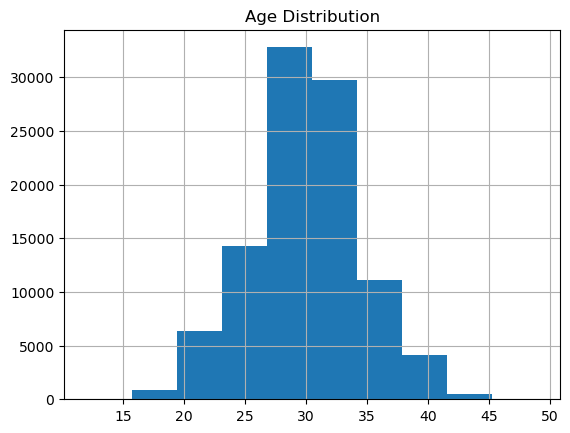

In [30]:
import matplotlib.pyplot as plt

# Age Distribution
plt.figure()
df['age'].hist()
plt.title("Age Distribution")
plt.show()

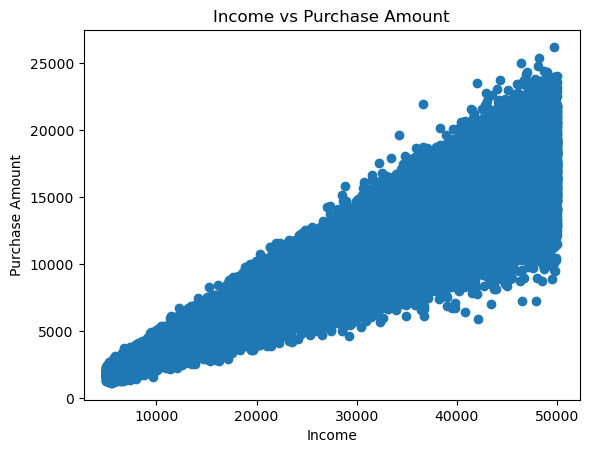

In [31]:
plt.figure()
plt.scatter(df['income'], df['purchase_amount'])
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.title("Income vs Purchase Amount")
plt.show()

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [35]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.99915
Precision: 0.9992032666069116
Recall: 0.9991037641904004
F1 Score: 0.9991535129213763
Confusion Matrix:
 [[ 9950     8]
 [    9 10033]]


In [36]:
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 9958     0]
 [    0 10042]]
